<a href="https://colab.research.google.com/github/omidmazi/github-slideshow/blob/master/Fashion_MNIST_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%tensorflow_version 2.x

In [32]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from skimage import io, transform
import numpy as np
import random

In [33]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
orig_test = x_test

In [34]:
batch_size = 128
img_rows, img_cols = 28, 28
num_classes = 10
epochs = 50
dropout = 0.5

In [ ]:
index = random.randrange(500)
plt.imshow(orig_test[index])
plt.title('Label: %d' % y_test[index])
plt.show()

In [36]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [37]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

Epoch 1/50
469/469 [==============================] - 8s 15ms/step - loss: 0.5529 - accuracy: 0.8030 - val_loss: 0.3489 - val_accuracy: 0.8714
Epoch 2/50
469/469 [==============================] - 7s 14ms/step - loss: 0.3590 - accuracy: 0.8723 - val_loss: 0.2979 - val_accuracy: 0.8868
Epoch 3/50
469/469 [==============================] - 7s 14ms/step - loss: 0.3069 - accuracy: 0.8883 - val_loss: 0.2680 - val_accuracy: 0.9012
Epoch 4/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2735 - accuracy: 0.9007 - val_loss: 0.2507 - val_accuracy: 0.9086
Epoch 5/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2502 - accuracy: 0.9090 - val_loss: 0.2363 - val_accuracy: 0.9143
Epoch 6/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2263 - accuracy: 0.9173 - val_loss: 0.2350 - val_accuracy: 0.9132
Epoch 7/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2099 - accuracy: 0.9232 - val_loss: 0.2270 - val_accuracy: 0.9175

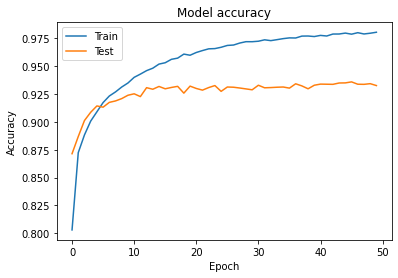

In [38]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()